<a href="https://colab.research.google.com/github/Arka1212/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Importing important libraries for data manipulation & data analysis**





In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Mounting the drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading the dataset**

In [6]:
file_path = '/content/drive/MyDrive/Capstone Projects/Exploratory Data Analysis(EDA)/Hotel Booking Analysis/Hotel Bookings.csv'
hotel_df = pd.read_csv(file_path)

# **Shape of dataset**

In [7]:
# It shows the number of rows and columns in the dataset.
hotel_df.shape        # Number of ROWS = 119390
                      # Number of COLUMNS = 32

(119390, 32)

# **Glimpse of the dataset**

In [8]:
# First 5 rows of the dataset.
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
# Last 5 rows of the dataset.
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# **Information regarding the data present in dataset**

In [10]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Summary of the numerical data**

In [11]:
# It shows the mean, maximum values, minimum values, std values etc.
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **Column names**

In [12]:
# Listing all the column label names of the dataset.
list(hotel_df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

# **Dealing with null values** 

In [13]:
# Total number of null values in each column.
hotel_df.isnull().sum()

# 4 null values present in 'children' column.
# 488 null values present in 'country' column.
# 16340 null values present in 'agent' column.
# 112593 null values present in 'company' column

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
# 'agent' & 'company' are two columns with huge amount of null values in it.
# These are also not so essential for this analysis so we can drop these two columns.

new_hotel_df = hotel_df.drop(['agent','company'],axis = 1)
new_hotel_df

# 'new_hotel_df' is the new dataframe we created which does not include 'agent' & 'company' columns.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [15]:
# 'children' & 'country' are two remaining columns which has null values.
# We will rather replace the null values in this columns as number of null values are lesser than previous two columns.

new_hotel_df['country'].fillna(new_hotel_df['country'].mode().to_string(), inplace=True)
new_hotel_df['children'].fillna(round(new_hotel_df['children'].mean()), inplace=True)

# Replacing null values of 'country' column with the mode value of the column.
# Replacing null values of 'children' column with the mean value of the column.

In [16]:
# Deleting rows with empty cells.
new_hotel_df = new_hotel_df.dropna(axis=0)

In [17]:
# Re-checking the number of null values to ensure the data cleaning is successful.
new_hotel_df.isnull().sum()

# We observe that there are no more null values in the dataset so, the data is cleaned.

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# **Merging and creating new columns**

In [18]:
# Creating a new column which will show total number of members.
new_hotel_df['Total_members'] = new_hotel_df['adults'] + new_hotel_df['children'] + new_hotel_df['babies']
new_hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_members
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0


In [19]:
# Creating a new column which will show total number of night stays.
new_hotel_df['total_night_stays'] = new_hotel_df['stays_in_weekend_nights']+ new_hotel_df['stays_in_week_nights']
new_hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_members,total_night_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0,7


# **Types of hotel in the dataset and most preffered among those by the customers**

In [20]:
# Types of hotel present in the dataset.
most_preffered_hotel = new_hotel_df['hotel'].value_counts()
most_preffered_hotel

# Two types of hotel are there 'City hotel' and 'Resort Hotel'.

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [21]:
# Percentage of hotels preffered.
new_hotel_df['hotel'].value_counts(normalize=True)*100

City Hotel      66.446101
Resort Hotel    33.553899
Name: hotel, dtype: float64

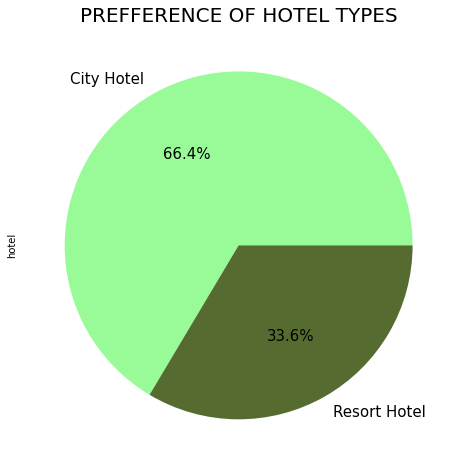

In [22]:
# In order to make it easy to understand about the prefference of hotels we can use data visualisation.
most_preffered_hotel.plot(kind='pie',colors =['palegreen','darkolivegreen'],autopct ='%1.1f%%',figsize =(8,8),fontsize= 15)
plt.title('PREFFERENCE OF HOTEL TYPES',fontsize = 20)
plt.show()

# The pie chart reveals that 66.4% of the hotels in the dataset are 'City Hotels' and the other 33.6% are 'Resort Hotels'.

# **Most preffered year for hotel booking**

In [23]:
# Need to find out the most preffered year by the customer for hotel booking.
most_preffered_year = new_hotel_df['arrival_date_year'].value_counts()
most_preffered_year

# We have a data of hotel booking that took place in 2015, 2016 & 2017.

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

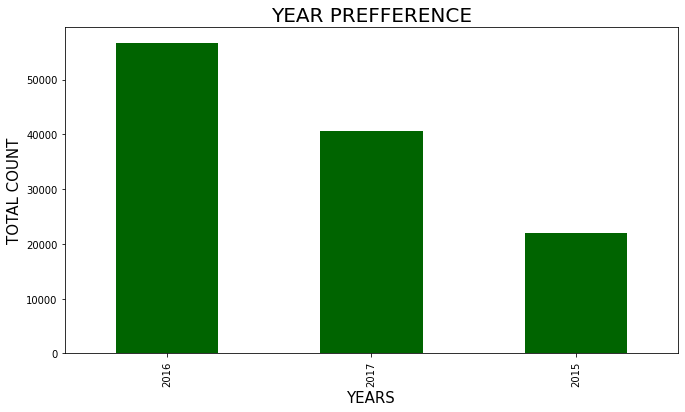

In [24]:
# Lets visualize the data for most preffered year.
most_preffered_year.plot(kind = 'bar',color ='darkgreen',fontsize = 10,figsize=(11,6))
plt.title('YEAR PREFFERENCE',fontsize = 20)
plt.xlabel('YEARS',fontsize = 15)
plt.ylabel('TOTAL COUNT',fontsize = 15)
plt.show()

# We get to see that in 2016 most hotels were booked followed by 2017 and 2015.

# **Most preffered month for hotel booking**

In [25]:
# Most preffered month by the customers.
most_preffered_month = new_hotel_df['arrival_date_month'].value_counts()
most_preffered_month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

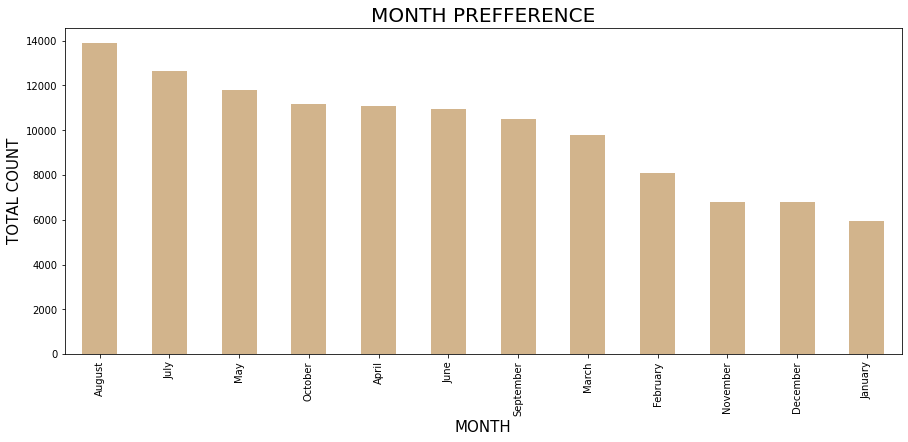

In [26]:
# Visualisation of data for most preffered month.
most_preffered_month.plot(kind = 'bar',color ='tan',fontsize = 10,figsize=(15,6))
plt.title('MONTH PREFFERENCE',fontsize = 20)
plt.xlabel('MONTH',fontsize = 15)
plt.ylabel('TOTAL COUNT',fontsize = 15)
plt.show()

# Its clear from this bar chart that most preffered month for booking hotel is 'August' whereas 'January' is the least preffered.

# **Most preffered country for hotel booking**

In [27]:
# Prefferences of country by customer for hotel booking.
# As there lots of countries in the data so we will only consider top 10.
most_preffered_country = new_hotel_df['country'].value_counts().head(10)
most_preffered_country

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

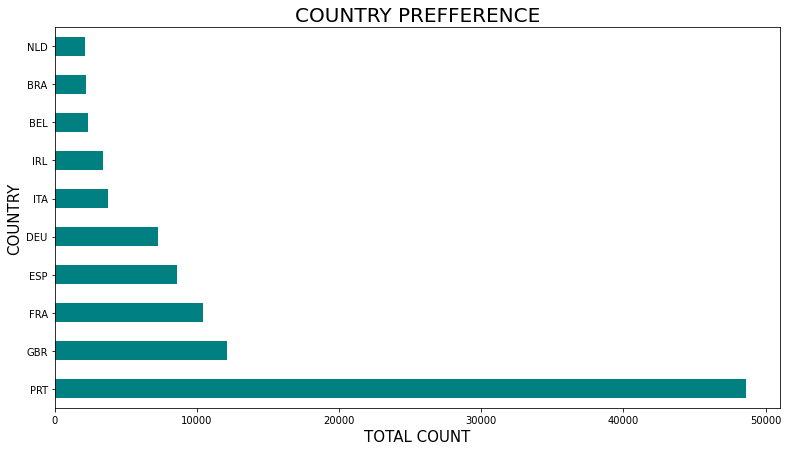

In [28]:
# Plotting the data ragarding most preffered country.
most_preffered_country.plot(kind = 'barh',color = 'teal',fontsize = 10,figsize=(13,7))
plt.title('COUNTRY PREFFERENCE',fontsize = 20)
plt.xlabel('TOTAL COUNT',fontsize = 15)
plt.ylabel('COUNTRY',fontsize = 15)
plt.show()

# The bar plot clearly conveys that 'PRT'(Portugal) is the most preffered among all the countries.

# **Prefference of hotels with repect to month**

In [29]:
# Monthly booking of hotels.
monthly_hotel_booked = new_hotel_df.groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()
monthly_hotel_booked

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,7480,3609
August,8983,4894
December,4132,2648
February,4965,3103
January,3736,2193
July,8088,4573
June,7894,3045
March,6458,3336
May,8232,3559


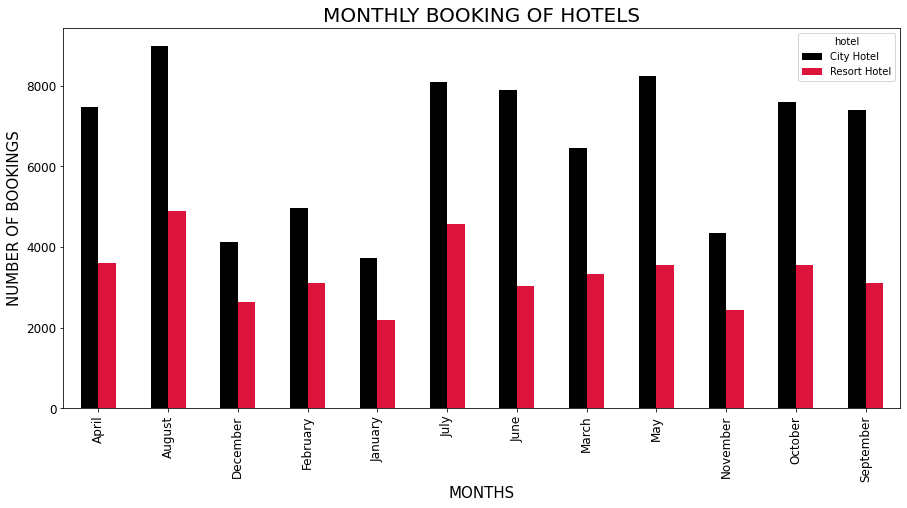

In [30]:
# Plotting the data to make it more easy to understand.
monthly_hotel_booked.plot(kind='bar',color=['black','crimson'],fontsize =12,figsize=(15,7))
plt.title('MONTHLY BOOKING OF HOTELS',fontsize = 20)
plt.ylabel('NUMBER OF BOOKINGS',fontsize = 15)
plt.xlabel('MONTHS',fontsize = 15)
plt.show()

# Via this visualisation we can clearly observe that 'City Hotel' is booked more than the 'Resort Hotel' in each and every month.

# **Prefference of hotels with repect to year**

In [31]:
# Yearly booking of hotels.
yearly_hotel_booked = new_hotel_df.groupby(['arrival_date_year','hotel'])['hotel'].count().unstack()
yearly_hotel_booked


hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,13682,8314
2016,38140,18567
2017,27508,13179


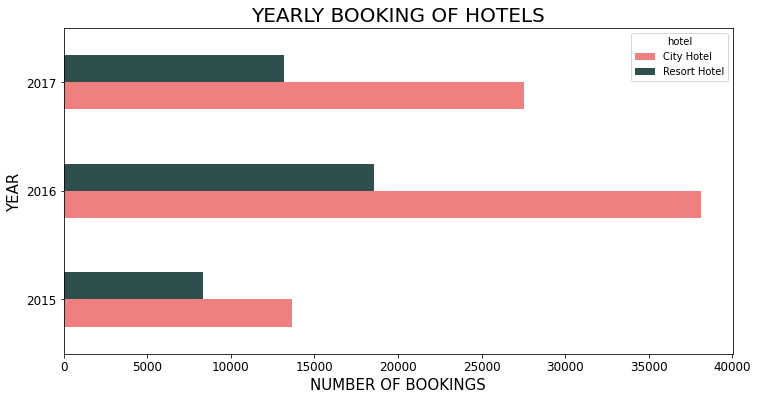

In [32]:
# Plotting the data to make it more easy to understand.
yearly_hotel_booked.plot(kind ='barh',color= ['lightcoral','darkslategray'],fontsize =12,figsize=(12,6))
plt.title('YEARLY BOOKING OF HOTELS',fontsize = 20)
plt.xlabel('NUMBER OF BOOKINGS',fontsize = 15)
plt.ylabel('YEAR',fontsize = 15)
plt.show()

# From this visualisation its clear that most hotel bookings took place in '2016' and in each year 'City Hotel' was most preffered.

# **Analysis on cancellation of hotels**

In [33]:
# Cancellation data of hotels(0 = Not cancelled & 1 = Cancelled)
booking_cancelled = new_hotel_df.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()
booking_cancelled 

is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122


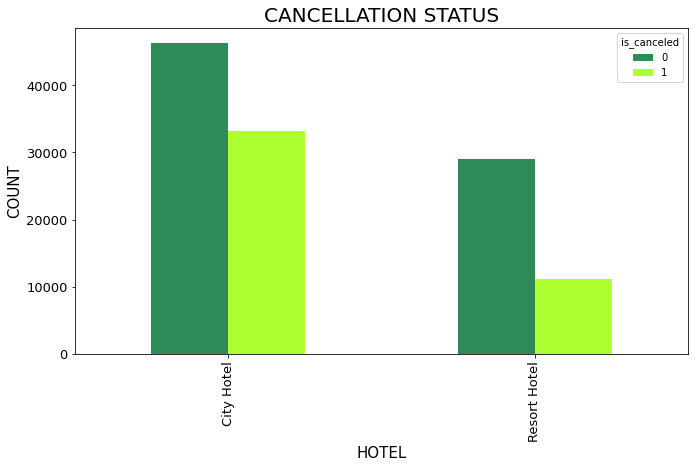

In [34]:
# Visualising cancellation data.
booking_cancelled.plot(kind='bar',figsize=(11,6),color=['seagreen','greenyellow'],fontsize=13)
plt.title('CANCELLATION STATUS',fontsize = 20)
plt.xlabel('HOTEL',fontsize = 15)
plt.ylabel('COUNT',fontsize = 15)
plt.show()

In [35]:
# Cancellation percentage of 'City Hotel'.
city_hotel_cancellation = new_hotel_df[new_hotel_df['hotel'] == 'City Hotel']
cancellation_city_hotel = city_hotel_cancellation['is_canceled'].value_counts(normalize=True)*100
cancellation_city_hotel

0    58.273037
1    41.726963
Name: is_canceled, dtype: float64

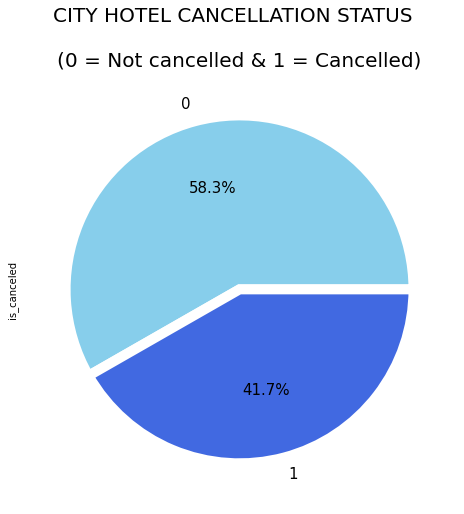

In [36]:
# Plotting it in pie chart.
cancellation_city_hotel.plot(kind='pie',colors=['skyblue','royalblue'],autopct ='%1.1f%%',figsize =(8,8),fontsize = 15,wedgeprops = {"edgecolor" : "white",
                      'linewidth': 10,
                      'antialiased': True})
plt.title('''CITY HOTEL CANCELLATION STATUS  

(0 = Not cancelled & 1 = Cancelled)''',fontsize = 20)
plt.show()

In [37]:
# Cancellation percentage of 'Resort Hotel'.
resort_hotel_cancellation = new_hotel_df[new_hotel_df['hotel'] == 'Resort Hotel']
cancellation_resort_hotel = resort_hotel_cancellation['is_canceled'].value_counts(normalize=True)*100
cancellation_resort_hotel

0    72.236645
1    27.763355
Name: is_canceled, dtype: float64

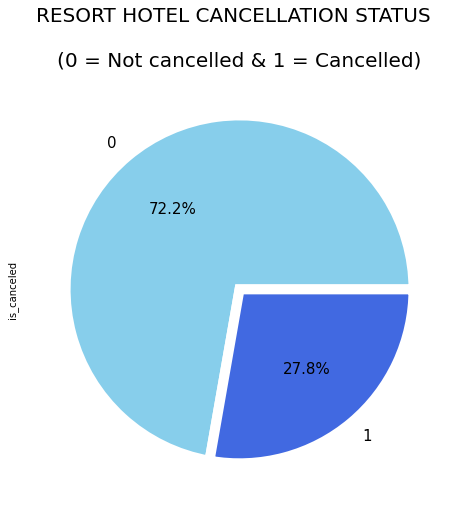

In [38]:
# Plotting it in pie chart.
cancellation_resort_hotel.plot(kind='pie',colors=['skyblue','royalblue'],autopct ='%1.1f%%',figsize =(8,8),fontsize = 15,wedgeprops = {"edgecolor" : "white",
                      'linewidth': 10,
                      'antialiased': True})
plt.title('''RESORT HOTEL CANCELLATION STATUS  
        
(0 = Not cancelled & 1 = Cancelled)''',fontsize = 20)
plt.show()

# **Hotel booking analysis with respect to different market segment**

In [39]:
# Different market segments and their total counts in the dataset.
market_segment_booking = new_hotel_df['market_segment'].value_counts()
market_segment_booking

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [40]:
# Making a dictionary with these market segment data.
d = dict(market_segment_booking)
print(d)
print(list(d.keys()))
print(list(d.values()))

{'Online TA': 56477, 'Offline TA/TO': 24219, 'Groups': 19811, 'Direct': 12606, 'Corporate': 5295, 'Complementary': 743, 'Aviation': 237, 'Undefined': 2}
['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate', 'Complementary', 'Aviation', 'Undefined']
[56477, 24219, 19811, 12606, 5295, 743, 237, 2]


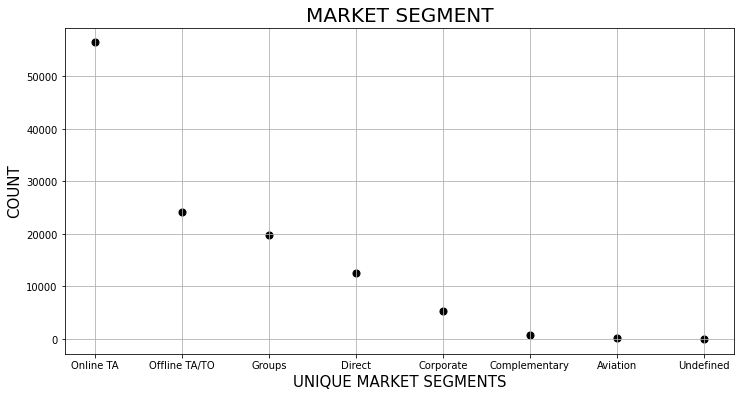

In [41]:
# Visualisation market segment data using scatter plot.
plt.figure(figsize=(12,6))
plt.scatter(list(d.keys()),list(d.values()),color = 'black',s=200,marker='.')
plt.title('MARKET SEGMENT',fontsize = 20)
plt.ylabel('COUNT',fontsize = 15)
plt.xlabel('UNIQUE MARKET SEGMENTS',fontsize = 15)
plt.grid(True)
plt.show()

# Scatter plot clearly conveys that 'Online TA' have the highest total count.

# **Analysis on the basis of ADR(average daily count rate)**  

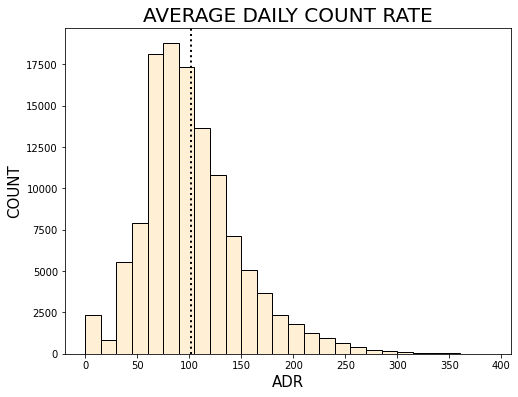

In [42]:
# ADR is kind of perfomance indicator of hotel.
# Plotting this 'adr' data to have an easy look and easy analysis.
bins= [i for i in range(0,400,15)]
plt.figure(figsize=(8,6))
plt.hist(new_hotel_df['adr'],bins,rwidth=10,color='papayawhip',ec='k')
plt.title("AVERAGE DAILY COUNT RATE",fontsize = 20)
plt.xlabel("ADR",fontsize = 15)
plt.ylabel("COUNT",fontsize = 15)
plt.axvline(new_hotel_df['adr'].mean(), color='k', linestyle=':', linewidth=2)
plt.show()

hotel
City Hotel      105.304465
Resort Hotel     94.952930
Name: adr, dtype: float64


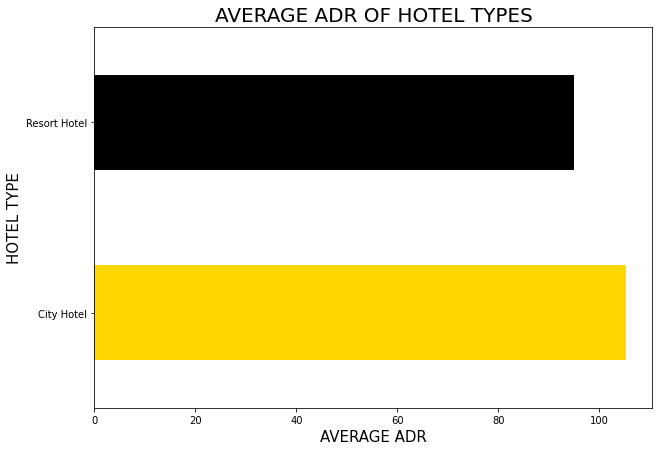

In [43]:
# Average ADR of different types of hotel.
avg_hotel_adr = new_hotel_df.groupby(['hotel'])['adr'].mean()
print(avg_hotel_adr)

# Visualisation.
avg_hotel_adr.plot(kind='barh', figsize=(10,7),color=['gold','k'])
plt.title('AVERAGE ADR OF HOTEL TYPES',fontsize = 20)
plt.ylabel('HOTEL TYPE',fontsize = 15)
plt.xlabel('AVERAGE ADR',fontsize = 15)
plt.show()

country
DJI    273.000000
AIA    265.000000
AND    202.652857
UMI    200.000000
LAO    181.665000
MYT    177.750000
NCL    175.500000
GEO    169.015909
COM    165.305000
FRO    155.200000
Name: adr, dtype: float64


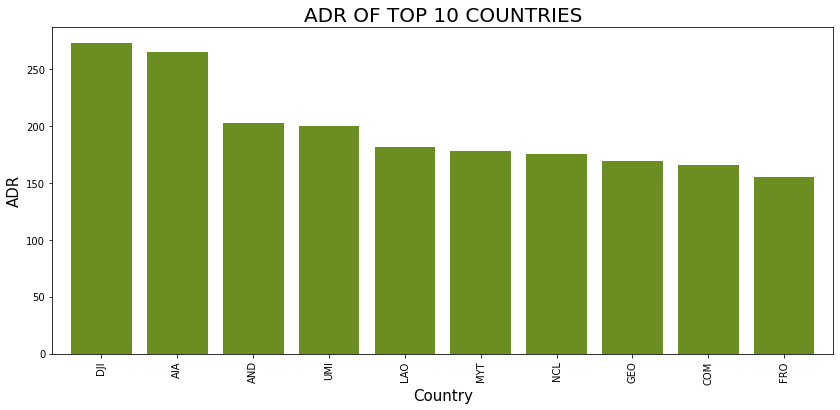

In [44]:
# Countries with best 'adr'.
# Considering top 10 countries.
country_adr = new_hotel_df.groupby(['country'])['adr'].mean().sort_values(ascending=False)[0:10]
print(country_adr)

# Visualisation.
country_adr.plot(kind='bar', figsize=(14,6),color='olivedrab',width=0.8)
plt.title('ADR OF TOP 10 COUNTRIES',fontsize=20)
plt.xlabel('Country',fontsize=15)
plt.ylabel('ADR',fontsize=15)
plt.show()

# 'Dji' have the highest ADR.

In [45]:
# Average ADR of different months and year.
adr_month_year= new_hotel_df.groupby(['arrival_date_month','arrival_date_year'])['adr'].mean()
adr_month_year

arrival_date_month  arrival_date_year
April               2016                  88.918920
                    2017                 111.370903
August              2015                 105.922888
                    2016                 142.893595
                    2017                 164.248370
December            2015                  74.079243
                    2016                  86.370246
February            2016                  70.102269
                    2017                  76.824005
January             2016                  64.767656
                    2017                  73.777264
July                2015                  97.834316
                    2016                 125.484536
                    2017                 143.037770
June                2016                 106.977315
                    2017                 125.757599
March               2016                  79.069326
                    2017                  82.242660
May                 2016  

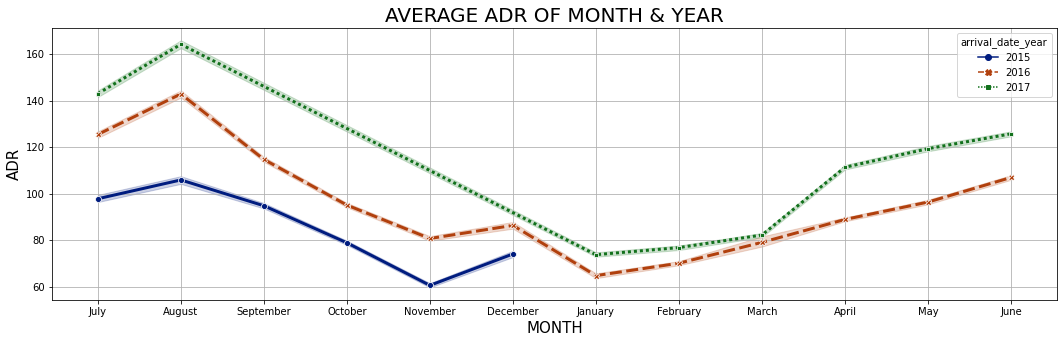

In [46]:
# Visualisation.
line,ax = plt.subplots(figsize=(18,5)) 
sns.lineplot(x='arrival_date_month',y='adr',data=new_hotel_df,hue='arrival_date_year',style='arrival_date_year',markers=True,palette='dark',linewidth=3)
ax.set_title('AVERAGE ADR OF MONTH & YEAR', fontsize=20)
ax.set_xlabel ('MONTH',fontsize=15)
ax.set_ylabel ('ADR',fontsize=15)
plt.grid(True)
plt.show()

# It seems that hotel business is scaling up each and every year.

# **Meal Analysis**

In [47]:
# Unique meal type.
unique_meal_count=new_hotel_df['meal'].value_counts()
unique_meal_count

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [48]:
# Percentage of meal type count.
percentage_meal_count = new_hotel_df['meal'].value_counts(normalize= True)*100
percentage_meal_count

BB           77.318033
HB           12.114080
SC            8.920345
Undefined     0.979144
FB            0.668398
Name: meal, dtype: float64

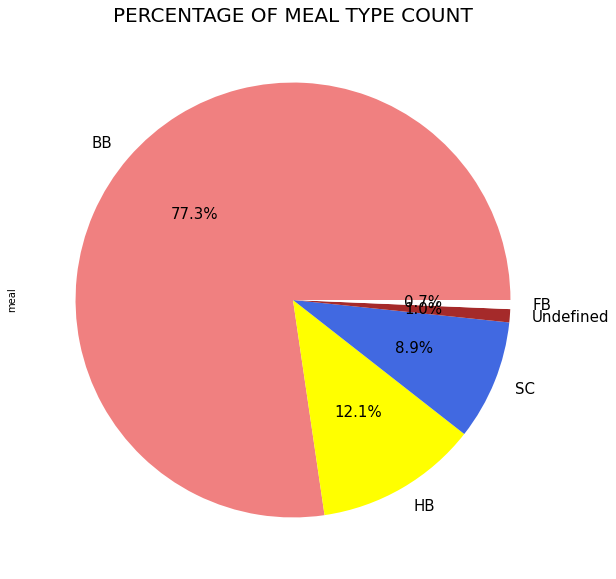

In [49]:
# Visualisation of percentage meal count
percentage_meal_count.plot(kind = 'pie',labels=percentage_meal_count.index,figsize=(10,10),autopct='%0.1f%%',colors=['lightcoral','yellow','royalblue','brown','white'],fontsize=15)
plt.title('PERCENTAGE OF MEAL TYPE COUNT', fontsize=20)
plt.show()

# **Requirement of Car parking**

In [50]:
# Car parking requirement count.
car_parking = new_hotel_df['required_car_parking_spaces'].value_counts()
car_parking

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

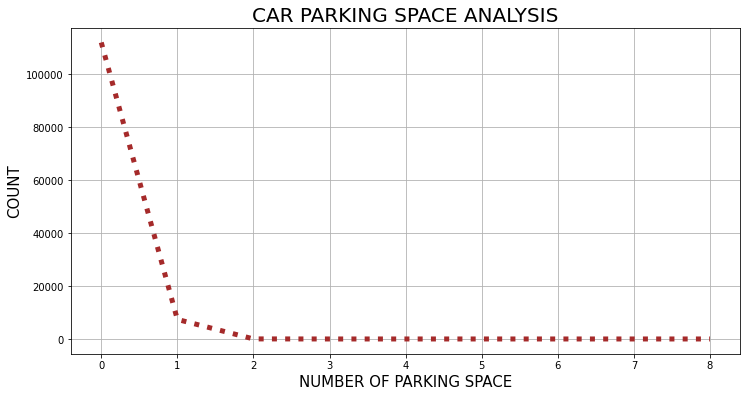

In [51]:
# Visualisation.
car_parking.plot(kind='line',color='brown',linestyle=':',linewidth=5,figsize =(12,6))
plt.title('CAR PARKING SPACE ANALYSIS',fontsize = 20)
plt.ylabel('COUNT',fontsize = 15)
plt.xlabel('NUMBER OF PARKING SPACE',fontsize = 15)
plt.grid(True)
plt.show()

# **Analysis on repeated guest**

0    115580
1      3810
Name: is_repeated_guest, dtype: int64


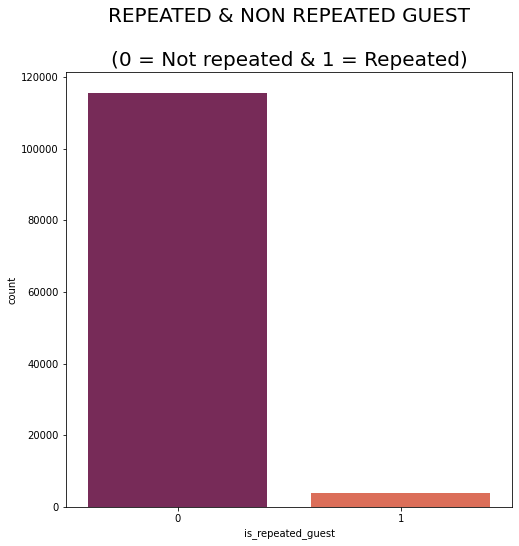

In [52]:
# Count of repeated and non-repeated guest.(0 = Not repeated & 1 = Repeated)
print(new_hotel_df['is_repeated_guest'].value_counts())

# Visualisation.
plt.figure(figsize=(8,8))
sns.countplot(data = new_hotel_df, x = 'is_repeated_guest',palette='rocket')
plt.title('''REPEATED & NON REPEATED GUEST

(0 = Not repeated & 1 = Repeated)''',fontsize=20)
plt.show()

# It shows that most of the guests do not repeat their bookings.

# **Analysis on total nights stays**

In [53]:
# Total count of night stays.
night_stays = new_hotel_df['total_night_stays'].value_counts().sort_values()[0:30]
night_stays

60     1
57     1
34     1
38     1
43     1
49     1
45     1
46     1
48     1
69     1
56     2
33     3
42     4
35     5
27     5
24     6
26     6
23     8
30    13
22    14
20    14
29    14
17    20
19    22
18    35
28    35
25    37
16    40
21    71
15    75
Name: total_night_stays, dtype: int64

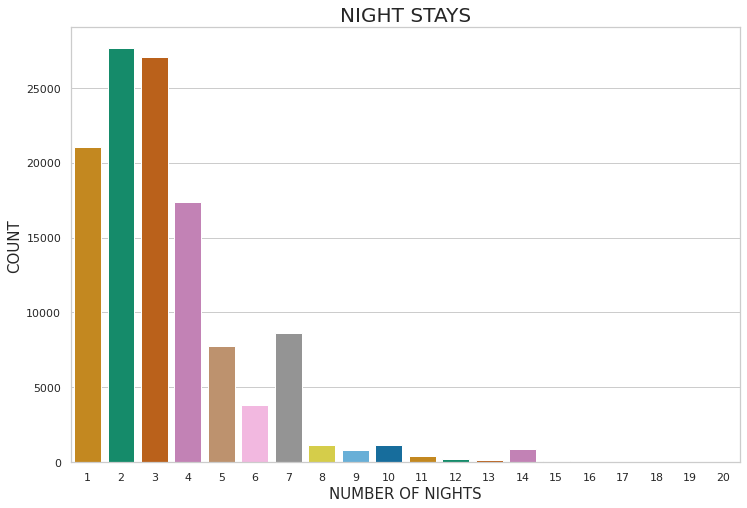

In [54]:
# Visualisation of night stay data till 20 nights.
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
sns.countplot(x=new_hotel_df['total_night_stays'],palette = 'colorblind')
plt.xlim(0.5,20.5)
plt.title('NIGHT STAYS',fontsize=20)
plt.xlabel('NUMBER OF NIGHTS', fontsize=15)
plt.ylabel('COUNT', fontsize=15)
plt.show()

# Most preffered number of night stays by the guest are 1,2,3,4,5 & 7.

# **Correlation Analysis**

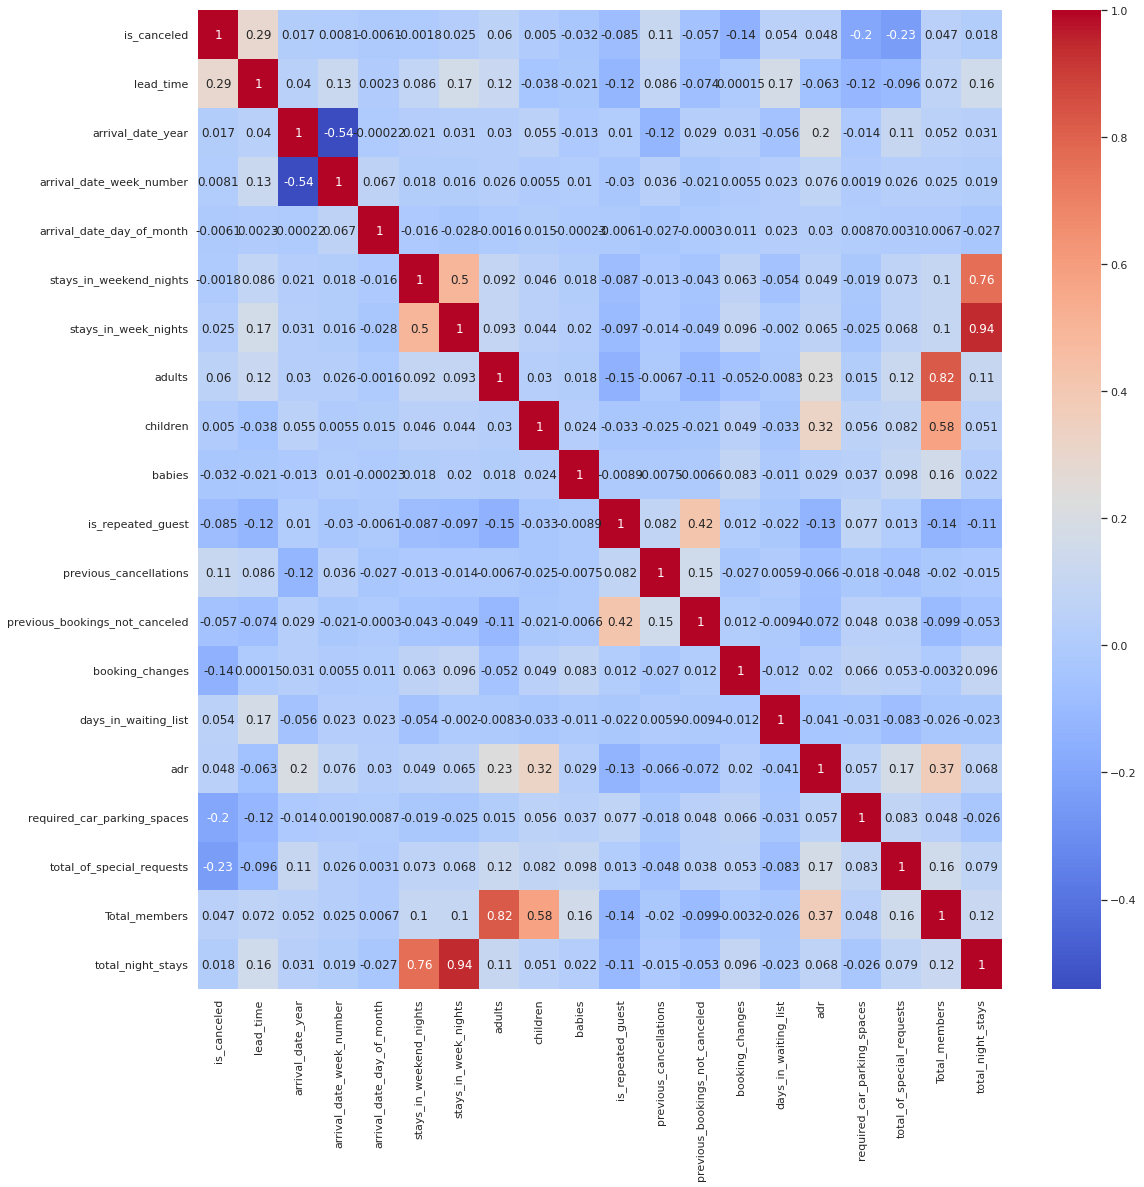

In [60]:
# Correlation between the column variables using a heatmap.
plt.figure(figsize=(18,18))
sns.heatmap(new_hotel_df.corr(), cmap= 'coolwarm' ,annot=True);

# **CONCLUSION :-**

1. 'City hotels' and 'Resort hotels' are two types of hotels present in the dataset, out of which, 'City hotels'are more preffered by the customers than the latter. (66.4% customer prefers 'City hotels' whereas 33.6% customer prefers 'Resort hotels').
-----------------------------------------------------------------
2. Dataset contains booking data of 3 different years(2017,2016,2015), out of which, maximum hotel bookings took place in 2016 & 2015 witnessed the least number of hotel bookings.
-----------------------------------------------------------------
3. Out of all months, 'August' witnessed highest number of hotel bookings whereas 'January' witnessed the least.
-----------------------------------------------------------------
4. Among all the countries in the dataset, PRT(Portugal) has got the maximum number of hotel bookings.
-----------------------------------------------------------------
5. Its observed that 'City hotels' was more cancelled as compared to 'Resort hotels'.
-----------------------------------------------------------------
6. Coming to the analysis of market segment, 'Online TA' brings maximum bookings.
-----------------------------------------------------------------
7. The value of ADR of hotels is approximately 100.
-----------------------------------------------------------------
8. Average ADR of 'City hotels' is more than that of 'Resort hotels'.
-----------------------------------------------------------------
9. 'DJI' has the highest average ADR among all countries.
-----------------------------------------------------------------
10. Considering all the three years, 'August' has got the highest average ADR in each year.
-----------------------------------------------------------------
11. Its observed that average ADR is incrementing every year from 2015 to 2017, which clearly states that hotel business is scaling up every year.
-----------------------------------------------------------------
12. After analysing the meal data, its found that 77.3% of customers prefers BB(Bread & Breakfast).
-----------------------------------------------------------------
13. Most of the hotels have 0 to 1 car parking space.
-----------------------------------------------------------------
14. Its observed that most of the customers rather guests do not repeat their bookings on which the hotel management must look into.
-----------------------------------------------------------------
